In [7]:
#load in libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('Analytics.csv')

In [9]:
#check the datatypes
df.dtypes

Device Category                   object
In-Market Segment                 object
Affinity Category (reach)         object
Day of Week                        int64
Source / Medium                   object
Avg. % Conversion Probability    float64
Avg. Session Duration             object
New Users                          int64
Sessions                           int64
Avg. Order Value                  object
Avg. QTY                         float64
dtype: object

In [10]:
#Remove dollar $
df['Avg. Order Value'] = df['Avg. Order Value'].str.split('$',n=2,expand=True)[1]


In [11]:
#check columns
df.columns

Index(['Device Category', 'In-Market Segment', 'Affinity Category (reach)',
       'Day of Week', 'Source / Medium', 'Avg. % Conversion Probability',
       'Avg. Session Duration', 'New Users', 'Sessions', 'Avg. Order Value',
       'Avg. QTY'],
      dtype='object')

In [12]:
#convert the float
df['Avg. Order Value'] = df['Avg. Order Value'].astype('float')
df.dtypes

Device Category                   object
In-Market Segment                 object
Affinity Category (reach)         object
Day of Week                        int64
Source / Medium                   object
Avg. % Conversion Probability    float64
Avg. Session Duration             object
New Users                          int64
Sessions                           int64
Avg. Order Value                 float64
Avg. QTY                         float64
dtype: object

In [13]:
#check the head of the data
df.head()

,Device Category,In-Market Segment,Affinity Category (reach),Day of Week,Source / Medium,Avg. % Conversion Probability,Avg. Session Duration,New Users,Sessions,Avg. Order Value,Avg. QTY
0,desktop,Business Services/Advertising & Marketing Serv...,Sports & Fitness/Sports Fans/American Football...,1,mall.googleplex.com / referral,20.1,0:05:50,4,13,183.88,1.71
1,desktop,Business Services/Advertising & Marketing Serv...,News & Politics/Avid News Readers,0,mall.googleplex.com / referral,19.8,0:03:17,3,10,32.76,1.17
2,desktop,Home & Garden/Home Furnishings,News & Politics/Avid News Readers,1,mall.googleplex.com / referral,19.3,0:05:08,3,13,423.18,16.60
3,desktop,Business Services/Advertising & Marketing Serv...,News & Politics/Avid News Readers/Avid Politic...,0,mall.googleplex.com / referral,18.8,0:04:08,3,12,44.75,1.00
4,desktop,Business Services/Advertising & Marketing Serv...,Food & Dining/Cooking Enthusiasts/Aspiring Chefs,1,mall.googleplex.com / referral,18.4,0:01:57,3,11,0.00,0.00


In [14]:
#get the total seconds by splitting the string & converting to numbers
df['duration in min'] = df['Avg. Session Duration'].str.split(':',n=3, expand= True,)[1]
df['duration in seconds'] = df['Avg. Session Duration'].str.split(':',n=3, expand= True,)[2] 
df['duration in min'] = pd.to_numeric(df['duration in min'])
df['duration in seconds'] = pd.to_numeric(df['duration in seconds'])
df['duration in secons'] =(df['duration in min']*60)+df['duration in seconds']
df.head()

,Device Category,In-Market Segment,Affinity Category (reach),Day of Week,Source / Medium,Avg. % Conversion Probability,Avg. Session Duration,New Users,Sessions,Avg. Order Value,Avg. QTY,duration in min,duration in seconds,duration in secons
0,desktop,Business Services/Advertising & Marketing Serv...,Sports & Fitness/Sports Fans/American Football...,1,mall.googleplex.com / referral,20.1,0:05:50,4,13,183.88,1.71,5,50,350
1,desktop,Business Services/Advertising & Marketing Serv...,News & Politics/Avid News Readers,0,mall.googleplex.com / referral,19.8,0:03:17,3,10,32.76,1.17,3,17,197
2,desktop,Home & Garden/Home Furnishings,News & Politics/Avid News Readers,1,mall.googleplex.com / referral,19.3,0:05:08,3,13,423.18,16.60,5,8,308
3,desktop,Business Services/Advertising & Marketing Serv...,News & Politics/Avid News Readers/Avid Politic...,0,mall.googleplex.com / referral,18.8,0:04:08,3,12,44.75,1.00,4,8,248
4,desktop,Business Services/Advertising & Marketing Serv...,Food & Dining/Cooking Enthusiasts/Aspiring Chefs,1,mall.googleplex.com / referral,18.4,0:01:57,3,11,0.00,0.00,1,57,117


In [23]:
#get summary stats
stats  = df.describe()
stats

,Day of Week,Avg. % Conversion Probability,New Users,Sessions,Avg. Order Value,Avg. QTY,duration in min,duration in seconds,duration in secons
count,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000,8386.000000
mean,0.712378,3.071047,15.883735,22.696637,24.442736,0.922212,2.029812,29.393036,151.181731
std,0.452681,3.583467,12.666078,17.731618,83.438298,4.959582,1.647555,17.261656,97.451493
min,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.700000,9.000000,13.000000,0.000000,0.000000,1.000000,14.000000,82.000000
50%,1.000000,1.600000,12.000000,17.000000,0.000000,0.000000,2.000000,30.000000,129.000000
75%,1.000000,3.700000,18.000000,25.000000,0.000000,0.000000,3.000000,44.000000,199.000000
max,1.000000,20.100000,135.000000,187.000000,779.250000,75.000000,12.000000,59.000000,720.000000


<AxesSubplot:>

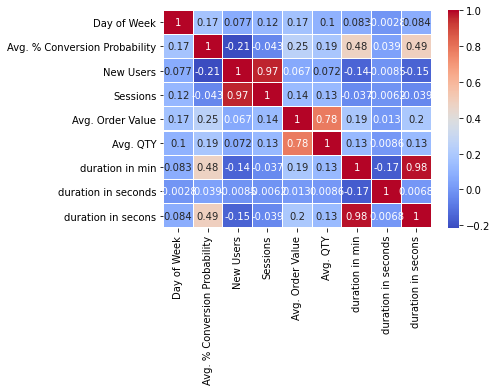

In [16]:
#create a heat map for correlation check
sns.heatmap(df.corr(),cmap='coolwarm',linewidth = 0.1, annot=True)

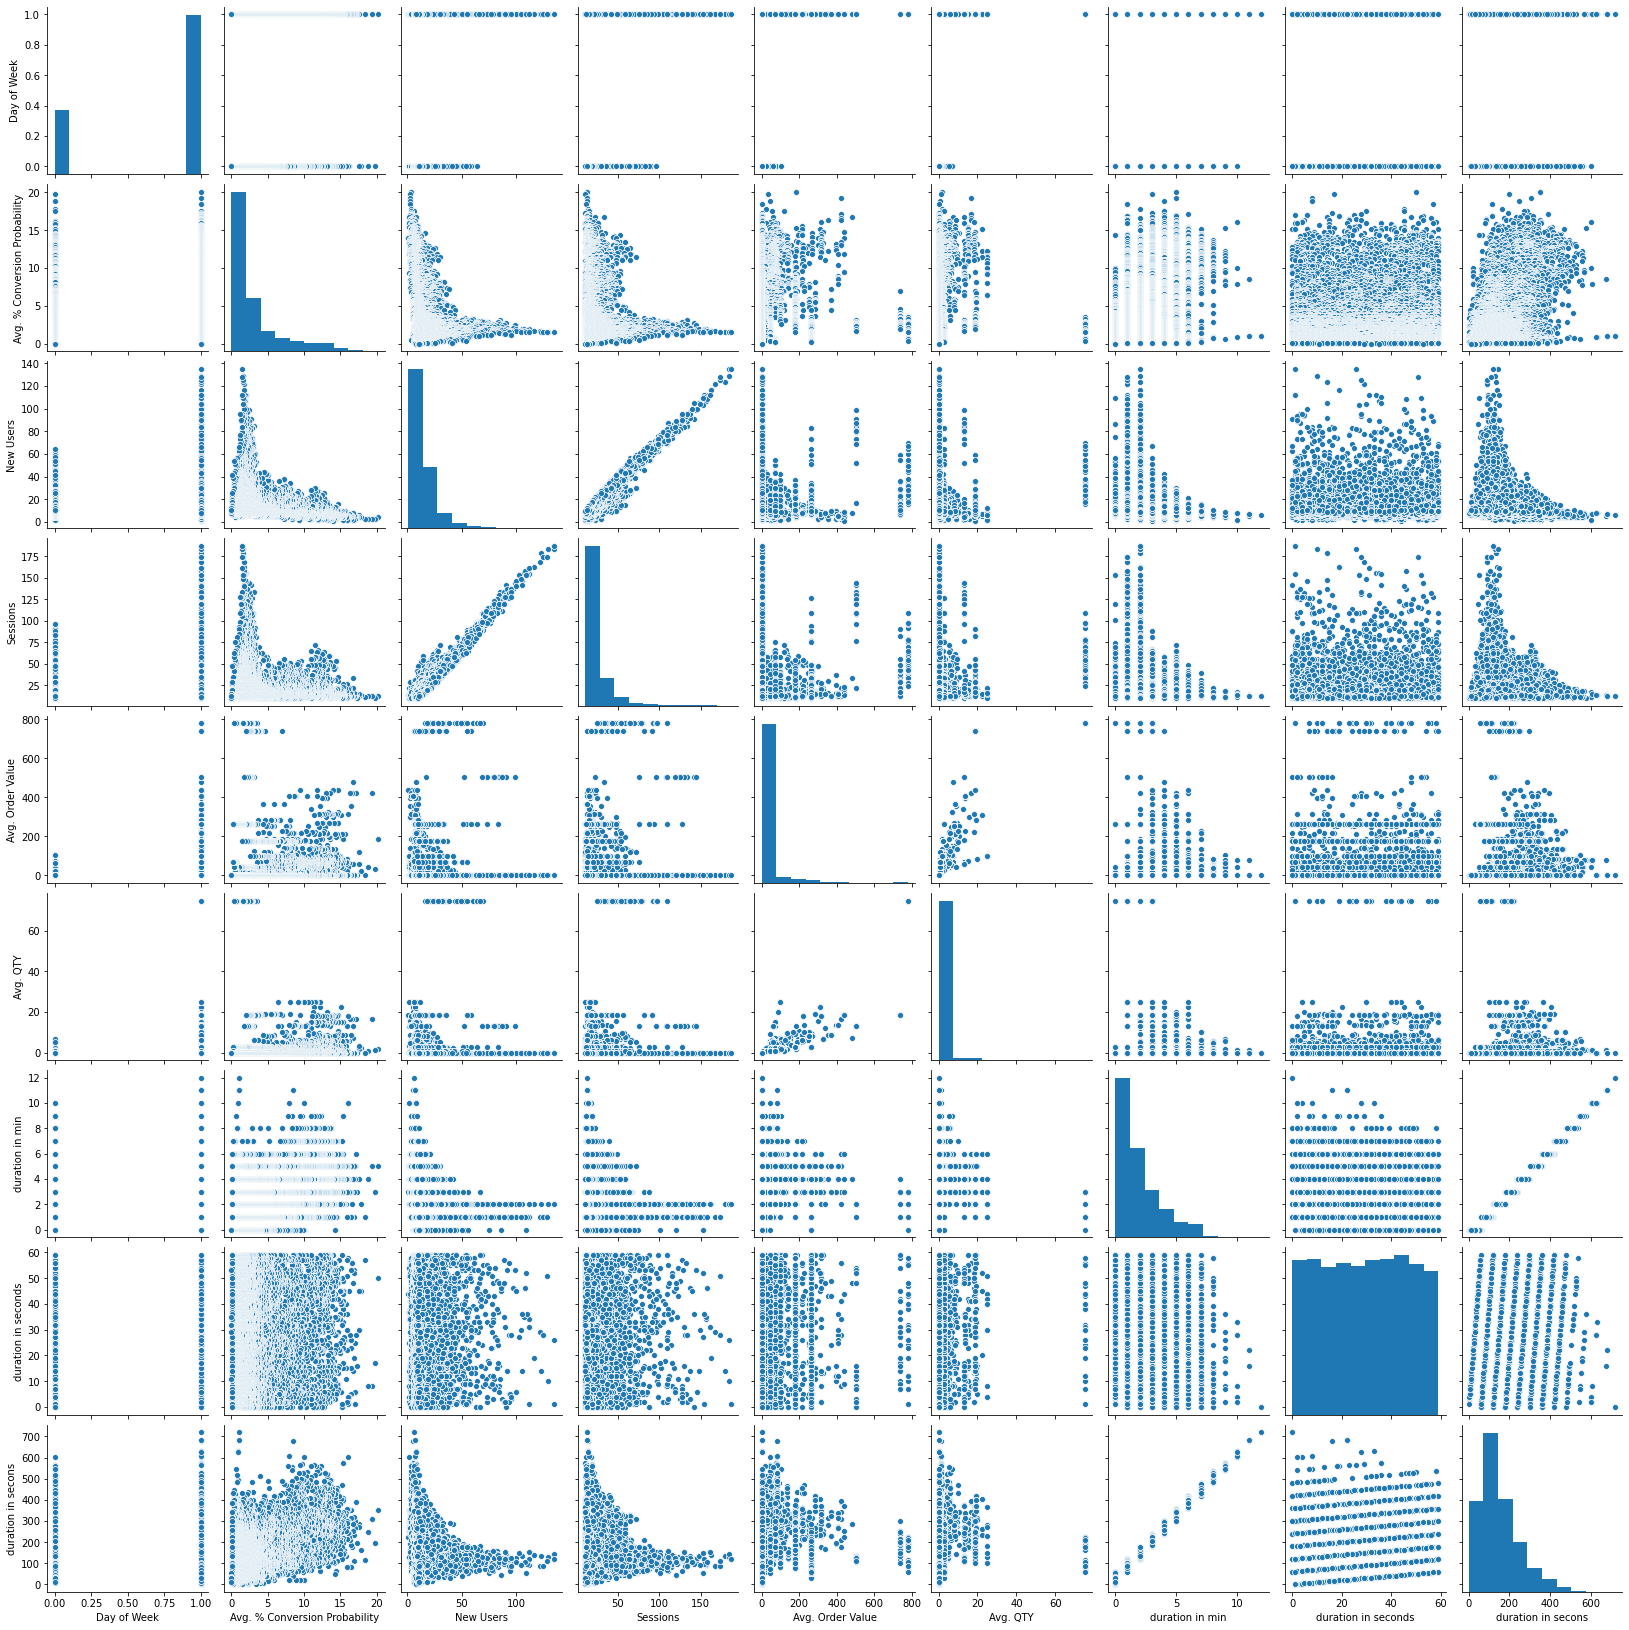

In [17]:
#create a pairplot to get a quick look at data distribution and correlations
sns.pairplot(df)